In [ ]:
import numpy as np
import pandas as pd

original = pd.read_csv("Employee.csv")
df = original

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(df, df[["LeaveOrNot"]]):
    strat_train_set = df.loc[train_indices]
    strat_test_set = df.loc[test_indices]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator,TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        encoder = OneHotEncoder()
        
        matrix = encoder.fit_transform(X[['Education']]).toarray()
        column_names = ["Bachelors", "Masters", "PHD"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[['City']]).toarray()
        column_names = ["Bangalore", "Pune", "New Delhi"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['Gender']]).toarray()
        column_names = ["Male", "Female"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['EverBenched']]).toarray()
        column_names = ["No", "Yes"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['JoiningYear']]).toarray()
        column_names = ["2012", "2013", "2014", "2015", "2016", "2017", "2018"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]   
            
        return X

In [ ]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X.drop(["Education", "City", "Gender", "EverBenched", "JoiningYear"], axis=1,errors="ignore")

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [ ]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['LeaveOrNot'], axis=1)
y = strat_train_set['LeaveOrNot']

scaler = StandardScaler()

X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10,100,200,500], "max_depth": [None,5,10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf = grid_search.best_estimator_

In [ ]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [ ]:
X_test = strat_test_set.drop(['LeaveOrNot'], axis=1)
y_test = strat_test_set['LeaveOrNot']

scaler = StandardScaler()

X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [ ]:
final_clf.score(X_data_test, y_data_test)

0.8506981740064447

In [ ]:
#this data comprises of 4653 observations and 9 characteristic
df.shape

(4653, 9)

In [ ]:
#to know the columns and their corresponding data types
df.info()
#datatypes are object and integer values
#no variable column has null/missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

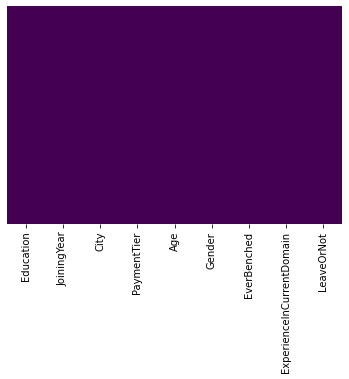

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
#this shows that the data has no missing values because the whole heatmap has the same colur sahde

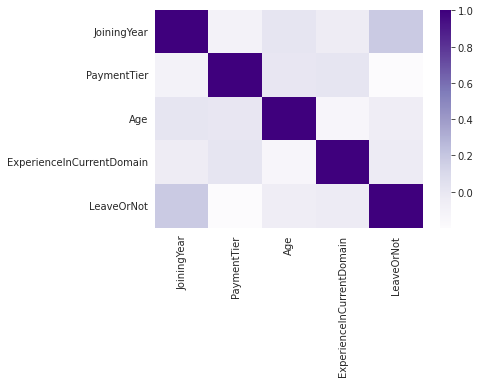

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Purples',annot=False)
#the darker shade show positive correlation 
#the lighter shades show negative correlation